## Pre-processing

In [209]:
#First import the required libraries such as pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
data = pd.read_excel("Dataset.xlsx") #load the data as pandas dataframe
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [211]:
data.info() #Getting information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [212]:
#Droping the NAN values from the data
data.dropna(inplace = True)
#Checking if any nan value remains
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [213]:
#Extracting date, month, year from the Date_of_journey feature and then droping it

data["date"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["month"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
data["year"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.year
data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [214]:
#Extracting hour, min from Dep_time feature and then droping it

data["hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop(["Dep_Time"], axis = 1, inplace = True)

In [215]:
#Extracting hour, min from Arrival_time feature and then droping it

data["Arrival_time_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour
data["Arrival_time_min"] = pd.to_datetime(data.Arrival_Time).dt.minute
data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [216]:
#Extracting hour, min from Duration feature and then droping it

data.Duration = data.Duration.str.split(' ')
data['Duration_hours'] = data.Duration.str[0]
data["Duration_hours"] = data['Duration_hours'].str.split('h')
data["Duration_hours"] = data['Duration_hours'].str[0]
data.Duration_hours = data.Duration_hours

data["Duration_mins"] = data.Duration.str[1]
data.Duration_mins = data.Duration_mins.str.split('m')
data.Duration_mins = data.Duration_mins.str[0]


data.drop(["Duration"], axis = 1, inplace = True)

In [217]:
#Spliting the Route feature into different cities 
data.Route = data.Route.str.split('→')

In [218]:
data['City_1'] = data.Route.str[0]
data['City_2'] = data.Route.str[1]
data['City_3'] = data.Route.str[2]
data['City_4'] = data.Route.str[3]
data['City_5'] = data.Route.str[4]
data['City_6'] = data.Route.str[5]

In [219]:
#First, replace the non-stop keyword by 0 and storing the first integer value

data.Total_Stops.replace('non-stop', '0', inplace = True)
data.Total_Stops = data.Total_Stops.str.split(' ')
data.Total_Stops = data.Total_Stops.str[0]

In [220]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,date,month,year,...,Arrival_time_hour,Arrival_time_min,Duration_hours,Duration_mins,City_1,City_2,City_3,City_4,City_5,City_6
0,IndiGo,Banglore,New Delhi,"[BLR , DEL]",0,No info,3897,24,3,2019,...,1,10,2,50,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,"[CCU , IXR , BBI , BLR]",2,No info,7662,1,5,2019,...,13,15,7,25,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,"[DEL , LKO , BOM , COK]",2,No info,13882,9,6,2019,...,4,25,19,NaN,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,"[CCU , NAG , BLR]",1,No info,6218,12,5,2019,...,23,30,5,25,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,"[BLR , NAG , DEL]",1,No info,13302,1,3,2019,...,21,35,4,45,BLR,NAG,DEL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,"[CCU , BLR]",0,No info,4107,9,4,2019,...,22,25,2,30,CCU,BLR,NaN,NaN,NaN,NaN
10679,Air India,Kolkata,Banglore,"[CCU , BLR]",0,No info,4145,27,4,2019,...,23,20,2,35,CCU,BLR,NaN,NaN,NaN,NaN
10680,Jet Airways,Banglore,Delhi,"[BLR , DEL]",0,No info,7229,27,4,2019,...,11,20,3,NaN,BLR,DEL,NaN,NaN,NaN,NaN
10681,Vistara,Banglore,New Delhi,"[BLR , DEL]",0,No info,12648,1,3,2019,...,14,10,2,40,BLR,DEL,NaN,NaN,NaN,NaN


Missing values treatment

In [221]:
data.drop(["City_4", "City_5", "City_6"], axis = 1, inplace = True)

In [222]:
data["City_3"].fillna('None', inplace = True)

In [223]:
data.drop(["Route"], axis = 1, inplace = True)

In [224]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,hour,min,Arrival_time_hour,Arrival_time_min,Duration_hours,Duration_mins,City_1,City_2,City_3
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,22,20,1,10,2,50,BLR,DEL,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,5,50,13,15,7,25,CCU,IXR,BBI
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,9,25,4,25,19,NaN,DEL,LKO,BOM
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,18,5,23,30,5,25,CCU,NAG,BLR
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,16,50,21,35,4,45,BLR,NAG,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,19,55,22,25,2,30,CCU,BLR,None
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,20,45,23,20,2,35,CCU,BLR,None
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,8,20,11,20,3,NaN,BLR,DEL,None
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,11,30,14,10,2,40,BLR,DEL,None


Countplot for categorical data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

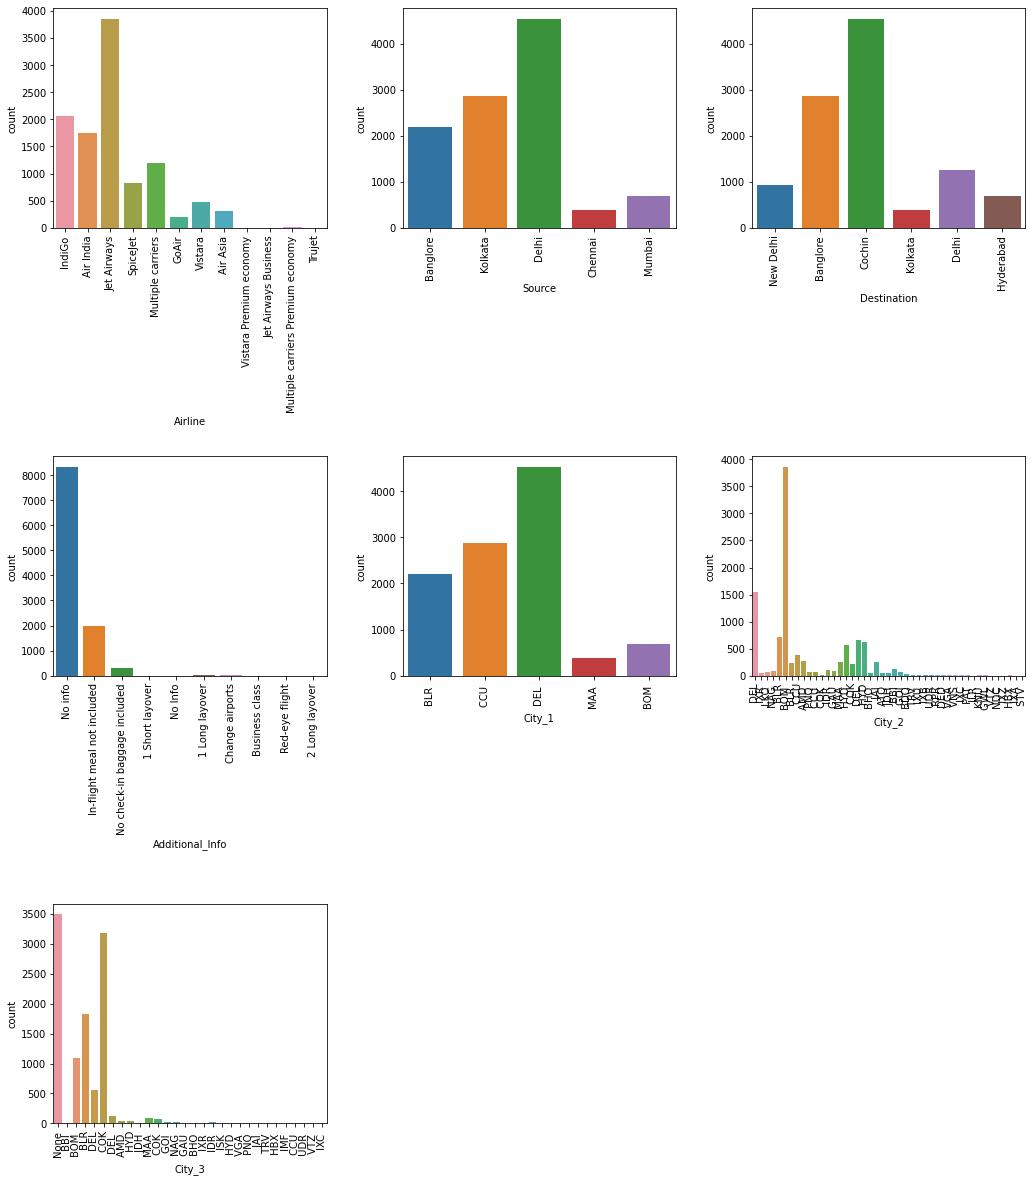

In [225]:
categorical_list = ['Airline', 'Source', 'Destination', 'Additional_Info', 'City_1', 'City_2', 'City_3']
p = 1
plt.figure(figsize=(15,35))
for i in categorical_list:
  plt.subplot(6,3,p)
  sns.countplot(data[i])
  plt.xticks(rotation = 90)
  plt.tight_layout(pad = 3.0)
  p=p+1

plt.show()

Label encoding for categorical data

In [226]:
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
data['Airline'] = lable.fit_transform(data['Airline'])
data['Source'] = lable.fit_transform(data['Source'])
data['Destination'] = lable.fit_transform(data['Destination'])
data['Additional_Info'] = lable.fit_transform(data['Additional_Info'])
data['City_1'] = lable.fit_transform(data['City_1'])
data['City_2'] = lable.fit_transform(data['City_2'])
data['City_3'] = lable.fit_transform(data['City_3'])

In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  int64 
 1   Source             10682 non-null  int64 
 2   Destination        10682 non-null  int64 
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  int64 
 5   Price              10682 non-null  int64 
 6   date               10682 non-null  int64 
 7   month              10682 non-null  int64 
 8   year               10682 non-null  int64 
 9   hour               10682 non-null  int64 
 10  min                10682 non-null  int64 
 11  Arrival_time_hour  10682 non-null  int64 
 12  Arrival_time_min   10682 non-null  int64 
 13  Duration_hours     10682 non-null  object
 14  Duration_mins      9650 non-null   object
 15  City_1             10682 non-null  int64 
 16  City_2             10682 non-null  int64

In [228]:
#This step is used because when we change the data type of Duration_hours to integer , it gives error because of this value

data[data['Duration_hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,hour,min,Arrival_time_hour,Arrival_time_min,Duration_hours,Duration_mins,City_1,City_2,City_3
6474,1,4,3,2,8,17327,6,3,2019,16,50,16,55,5m,NaN,1,16,24


In [229]:
data.drop(index=6474, inplace = True, axis=0) #dropping that row from the data

In [230]:
data['Duration_mins'].fillna(0,inplace = True) #filling the nan values in Duration_mins by 0

In [231]:
data.Total_Stops = data.Total_Stops.astype('int64')
data.Duration_hours = data.Duration_hours.astype('int64')
data.Duration_mins = data.Duration_mins.astype('int64')

In [232]:
#Checking if all features are integer type or not

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Airline            10681 non-null  int64
 1   Source             10681 non-null  int64
 2   Destination        10681 non-null  int64
 3   Total_Stops        10681 non-null  int64
 4   Additional_Info    10681 non-null  int64
 5   Price              10681 non-null  int64
 6   date               10681 non-null  int64
 7   month              10681 non-null  int64
 8   year               10681 non-null  int64
 9   hour               10681 non-null  int64
 10  min                10681 non-null  int64
 11  Arrival_time_hour  10681 non-null  int64
 12  Arrival_time_min   10681 non-null  int64
 13  Duration_hours     10681 non-null  int64
 14  Duration_mins      10681 non-null  int64
 15  City_1             10681 non-null  int64
 16  City_2             10681 non-null  int64
 17  City_3      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


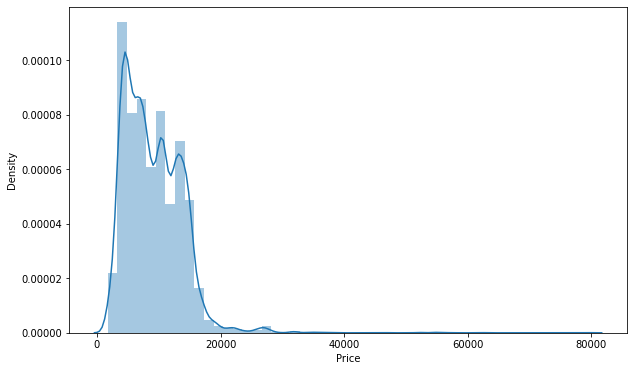

In [233]:
plt.figure(figsize=(10,6))
sns.distplot(data.Price)

## Feature selection

In [234]:
X = data.loc[:,data.columns!='Price']
y = data.loc[:,'Price']

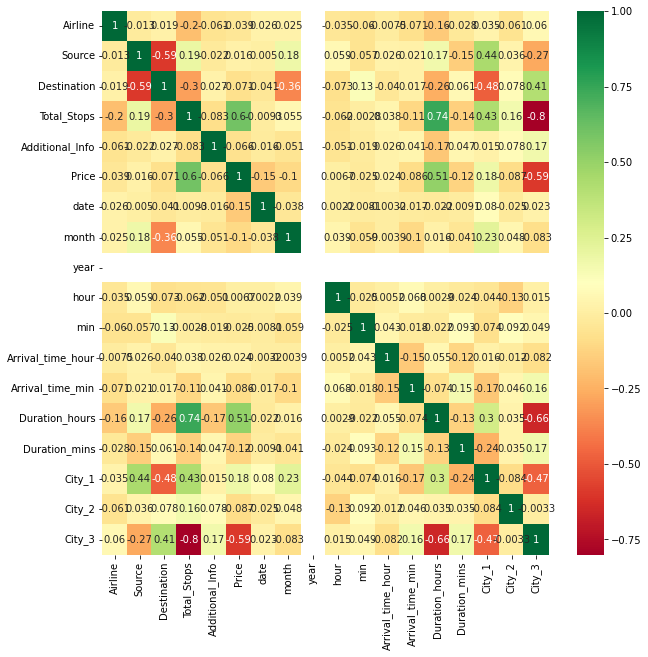

In [275]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [236]:
#feature selection is used to check the importance of particular column
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

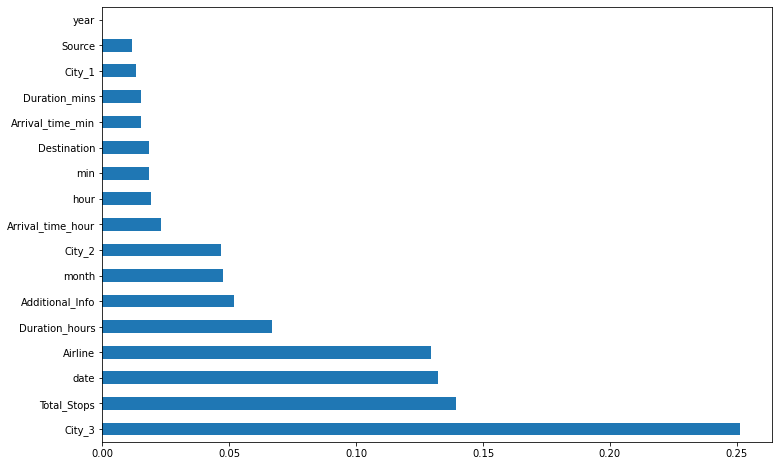

In [237]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Train-test data split

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Feature reduction

In [239]:
#Checking if feature reduction will give good result or not
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
randomforest = RandomForestRegressor(random_state=0)
score_for_pca = []
index_for_pca = []
for i in range(1,10):
  index_for_pca.append(i)
  pca = PCA(n_components=i)
  X_train_reduced = pca.fit_transform(X_train)
  X_test_reduced = pca.transform(X_test)
  randomforest.fit(X_train_reduced, y_train)
  y_pred_reduced = randomforest.predict(X_test_reduced)
  m = metrics.r2_score(y_test, y_pred_reduced)
  score_for_pca.append(m)

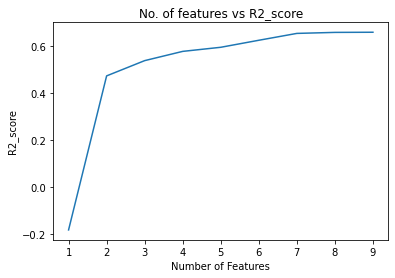

In [240]:
plt.plot(index_for_pca, score_for_pca)
plt.title('No. of features vs R2_score')
plt.xlabel('Number of Features')
plt.ylabel('R2_score') 
plt.show()

## Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor(random_state=0)
randomforest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [242]:
y_pred = randomforest.predict(X_test)

In [243]:
from sklearn import metrics
print("R2 Score for Random Forest Regressor model(For Training Data) :- ", metrics.r2_score(y_train, randomforest.predict(X_train)))
print("R2 Score for Random Forest Regressor model(For Testing Data) :- ", metrics.r2_score(y_test, y_pred))
print("Mean absolute error for Random Forest Regressor model :- ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error for Random Forest Regressor model :- ", metrics.mean_squared_error(y_test, y_pred))
print("Root mean squared error for Random Forest Regressor model :- ", metrics.mean_squared_error(y_test, y_pred, squared=False))


R2 Score for Random Forest Regressor model(For Training Data) :-  0.9799358001157015
R2 Score for Random Forest Regressor model(For Testing Data) :-  0.8774599023395623
Mean absolute error for Random Forest Regressor model :-  637.2354845005661
Mean squared error for Random Forest Regressor model :-  2601045.484837802
Root mean squared error for Random Forest Regressor model :-  1612.775708162112


## Linear Regression

In [244]:
from sklearn.linear_model import LinearRegression
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)

LinearRegression()

In [245]:
y_pred_lin = linearreg.predict(X_test)

In [246]:
from sklearn import metrics
print("R2 Score for Linear Regression model(For Training Data) :- ", metrics.r2_score(y_train, linearreg.predict(X_train)))
print("R2 Score for Linear Regression model(For Testing Data) :- ", metrics.r2_score(y_test, y_pred_lin))
print("Mean absolute error for Linear Regressor model :- ", metrics.mean_absolute_error(y_test, y_pred_lin))
print("Mean squared error for Linear Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_lin))
print("Root mean squared error for Linear Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_lin, squared=False))

R2 Score for Linear Regression model(For Training Data) :-  0.49050820612987833
R2 Score for Linear Regression model(For Testing Data) :-  0.5142388318738056
Mean absolute error for Linear Regressor model :-  2243.5973725799204
Mean squared error for Linear Regressor model :-  10310803.705782369
Root mean squared error for Linear Regressor model :-  3211.044021152991


## Decision tree regressor

In [247]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [248]:
y_pred_tree = tree.predict(X_test)

In [249]:
print("R2 Score for Decision Tree Regression model(For Training Data) :- ", metrics.r2_score(y_train, tree.predict(X_train)))
print("R2 Score for Decision Tree Regression model(For Testing Data) :- ", metrics.r2_score(y_test, y_pred_tree))
print("Mean absolute error for Decision Tree Regression model :- ", metrics.mean_absolute_error(y_test, y_pred_tree))
print("Mean squared error for Decision Tree Regression model :- ", metrics.mean_squared_error(y_test, y_pred_tree))
print("Root mean squared error for Decision Tree Regression model :- ", metrics.mean_squared_error(y_test, y_pred_tree, squared=False))

R2 Score for Decision Tree Regression model(For Training Data) :-  0.996140951067578
R2 Score for Decision Tree Regression model(For Testing Data) :-  0.759841096395939
Mean absolute error for Decision Tree Regression model :-  726.2498179927196
Mean squared error for Decision Tree Regression model :-  5097631.25531288
Root mean squared error for Decision Tree Regression model :-  2257.7934483280087


## KNeighborsRegressor

In [250]:
from sklearn.neighbors import KNeighborsRegressor
kneighbourmodel = KNeighborsRegressor()
kneighbourmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [251]:
y_pred_k = kneighbourmodel.predict(X_test)

In [252]:
print("R2 Score for KNeighbours Regressor model(For Training Data) :- ", metrics.r2_score(y_train, kneighbourmodel.predict(X_train)))
print("R2 Score for KNeighbours Regressor model(For Testing Data) :- ", metrics.r2_score(y_test, y_pred_k))
print("Mean absolute error for KNeighbours Regressor model :- ", metrics.mean_absolute_error(y_test, y_pred_k))
print("Mean squared error for KNeighbours Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_k))
print("Root mean squared error for KNeighbours Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_k, squared=False))

R2 Score for KNeighbours Regressor model(For Training Data) :-  0.7637245801547251
R2 Score for KNeighbours Regressor model(For Testing Data) :-  0.6452544578402343
Mean absolute error for KNeighbours Regressor model :-  1660.8936037441497
Mean squared error for KNeighbours Regressor model :-  7529856.008911077
Root mean squared error for KNeighbours Regressor model :-  2744.058310042095


## Gradient boosting regressor

In [253]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = GradientBoostingRegressor(random_state = 0)
gradient.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [254]:
y_pred_grad = gradient.predict(X_test)

In [255]:
print("R2 Score for Gradient Boosting Regressor model(For Training Data) :- ", metrics.r2_score(y_train, gradient.predict(X_train)))
print("R2 Score for Gradient Boosting Regressor model(For Testing Data) :- ", metrics.r2_score(y_test, y_pred_grad))
print("Mean absolute error for Gradient Boosting Regressor model :- ", metrics.mean_absolute_error(y_test, y_pred_grad))
print("Mean squared error for Gradient Boosting Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_grad))
print("Root mean squared error for Gradient Boosting Regressor model :- ", metrics.mean_squared_error(y_test, y_pred_grad, squared=False))

R2 Score for Gradient Boosting Regressor model(For Training Data) :-  0.8343761239599471
R2 Score for Gradient Boosting Regressor model(For Testing Data) :-  0.8573844722032504
Mean absolute error for Gradient Boosting Regressor model :-  1197.558048464638
Mean squared error for Gradient Boosting Regressor model :-  3027168.100285082
Root mean squared error for Gradient Boosting Regressor model :-  1739.875886460032


## Hyper parameter tuning

In [256]:
from sklearn.model_selection import GridSearchCV

In [257]:
param_grid = {'n_estimators':[10,30,50,70,90], 'max_depth':[None,1,2,3,4],'max_samples':[50,100,250,500,1000],'min_samples_split':[2,4,10]}
gsv_rfr = GridSearchCV(randomforest, param_grid, cv=5)

model = gsv_rfr.fit(X_train, y_train)

In [258]:
model.best_params_

{'max_depth': None,
 'max_samples': 1000,
 'min_samples_split': 2,
 'n_estimators': 90}

In [259]:
rfr_with_grid = RandomForestRegressor(n_estimators=70, max_depth=None, max_samples=1000, min_samples_split=4 )
rfr_with_grid.fit(X_train, y_train)
y_pred_rfr = rfr_with_grid.predict(X_test)


In [260]:
from sklearn import metrics
print("By GridSearchCV")
print("R2 Score for Random Forest Regressor model with hyper-parameters(For Training Data):- ",(metrics.r2_score(y_train, rfr_with_grid.predict(X_train))))
print("R2 Score for Random Forest Regressor model with hyper-parameters(For Testing Data):- ",(metrics.r2_score(y_test, y_pred_rfr)))
print("Mean absolute error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_absolute_error(y_test, y_pred_rfr))
print("Mean squared error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_squared_error(y_test, y_pred_rfr))
print("Root mean squared error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_squared_error(y_test, y_pred_rfr, squared=False))

By GridSearchCV
R2 Score for Random Forest Regressor model with hyper-parameters(For Training Data):-  0.8540847949940024
R2 Score for Random Forest Regressor model with hyper-parameters(For Testing Data):-  0.8388892503177395
Mean absolute error for Random Forest Regressor model with hyper-parameters :-  960.8868973330364
Mean squared error for Random Forest Regressor model with hyper-parameters :-  3419749.0945461364
Root mean squared error for Random Forest Regressor model with hyper-parameters :-  1849.2563625809528


In [261]:
from sklearn.model_selection import RandomizedSearchCV

In [268]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 5)]



In [269]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [270]:
# Random search of parameters, using 5 fold cross validation, 
randomsearchcv = RandomizedSearchCV(estimator = randomforest, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [271]:
randomsearchcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [272]:
randomsearchcv.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [273]:
prediction = randomsearchcv.predict(X_test)
print("By RandomizedSearchCV")
print("R2 Score for Random Forest Regressor model with hyper-parameters(For Training Data):- ", metrics.r2_score(y_train, randomsearchcv.predict(X_train)))
print("R2 Score for Random Forest Regressor model with hyper-parameters(For Testing Data):- ", metrics.r2_score(y_test, prediction))
print("Mean absolute error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_absolute_error(y_test, prediction))
print("Mean squared error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_squared_error(y_test, prediction))
print("Root mean squared error for Random Forest Regressor model with hyper-parameters :- ", metrics.mean_squared_error(y_test, prediction, squared=False))

By RandomizedSearchCV
R2 Score for Random Forest Regressor model with hyper-parameters(For Training Data):-  0.9785878382642988
R2 Score for Random Forest Regressor model with hyper-parameters(For Testing Data):-  0.9096612819417819
Mean absolute error for Random Forest Regressor model with hyper-parameters :-  716.6492359147827
Mean squared error for Random Forest Regressor model with hyper-parameters :-  1917536.538631515
Root mean squared error for Random Forest Regressor model with hyper-parameters :-  1384.7514356849445
